In [1]:
# load pickled data consisting of three environments
import pickle
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#enable inline visualization
%matplotlib inline


training_data = "./data/train.p"
testing_data = "./data/test.p"
valid_data = "./data/valid.p"

with open(training_data,mode='rb') as f:
    train = pickle.load(f)
with open(testing_data,mode='rb') as f:
    test = pickle.load(f)
with open(valid_data,mode='rb') as f:
    valid = pickle.load(f)
    

X_train,Y_train = train['features'],train['labels']
X_test,Y_test = test['features'],test['labels']
X_valid,Y_valid = valid['features'],valid['labels']

assert(len(X_train) == len(Y_train))
assert(len(X_valid) == len(Y_valid))
assert(len(X_test) == len(Y_test))


print(" X train shape is ", X_train.shape)
print(" Y train shape is ", Y_train.shape)
print(" X test shape is ", X_test.shape)
print(" Y test shape is ", Y_test.shape)
print(" X valid shape is ", X_valid.shape)
print(" Y valid shape is ", Y_valid.shape)
   

 X train shape is  (34799, 32, 32, 3)
 Y train shape is  (34799,)
 X test shape is  (12630, 32, 32, 3)
 Y test shape is  (12630,)
 X valid shape is  (4410, 32, 32, 3)
 Y valid shape is  (4410,)


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
Showing image # 34601 ...


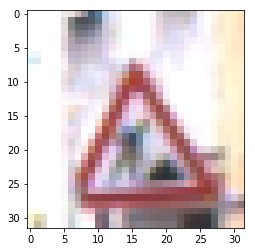

In [2]:
# print a random image

image_num = random.randint(0,len(X_train))
image = X_train[image_num,:,:,:]

# Show image
print('This image is:', type(image), 'with dimesions:', image.shape)
print('Showing image #', image_num, '...')
plt.imshow(image)  

In [3]:

# get number of training entries
no_train = len(X_train)

# get number of testing entries
no_test = len(X_test)

# get number of valid entries
no_valid = len(X_valid)

#get image shape
image_shape = X_train[0].shape

#get unique classes in teh dataset

no_classes = len(np.unique(Y_train))

#print all information

print('No of training entries', no_train)
print('No of training entries - y', len(Y_train))
print('No of testing entries', no_test)
print('No of valid entries', no_valid)

print('No of unique classes', no_classes)
print('image shape is ', image_shape)




No of training entries 34799
No of training entries - y 34799
No of testing entries 12630
No of valid entries 4410
No of unique classes 43
image shape is  (32, 32, 3)


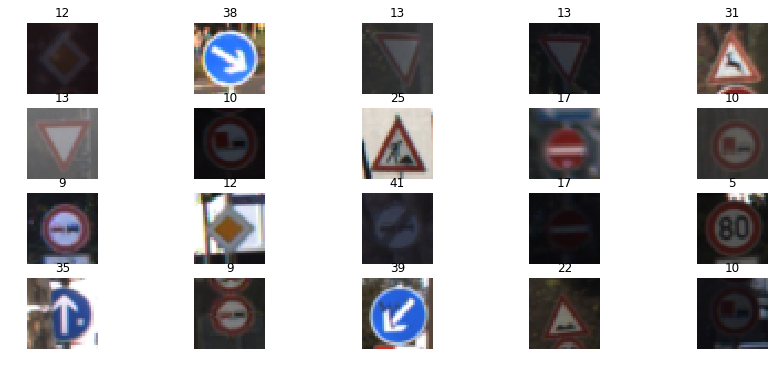

In [4]:
# start data visualization



# select random of 10 images
fig, axs = plt.subplots(4,5,figsize =(15,6))
fig.subplots_adjust(hspace=.2,wspace=0.001)
axs = axs.ravel()

for i in range(20):
    index = random.randint(0,len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(Y_train[index])   



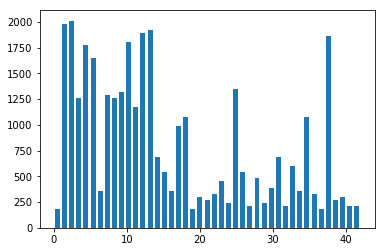

In [5]:
# Create histogram of label frequency
hist,bins = np.histogram(Y_train,bins=no_classes)
width=0.7 *(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center,hist,align='center',width=width)
plt.show()

In [6]:
# convert to grey scale

X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)


print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

#overwrite variables with grey shape

X_train = X_train_gry
X_test = X_test_gry
X_valid = X_valid_gry

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


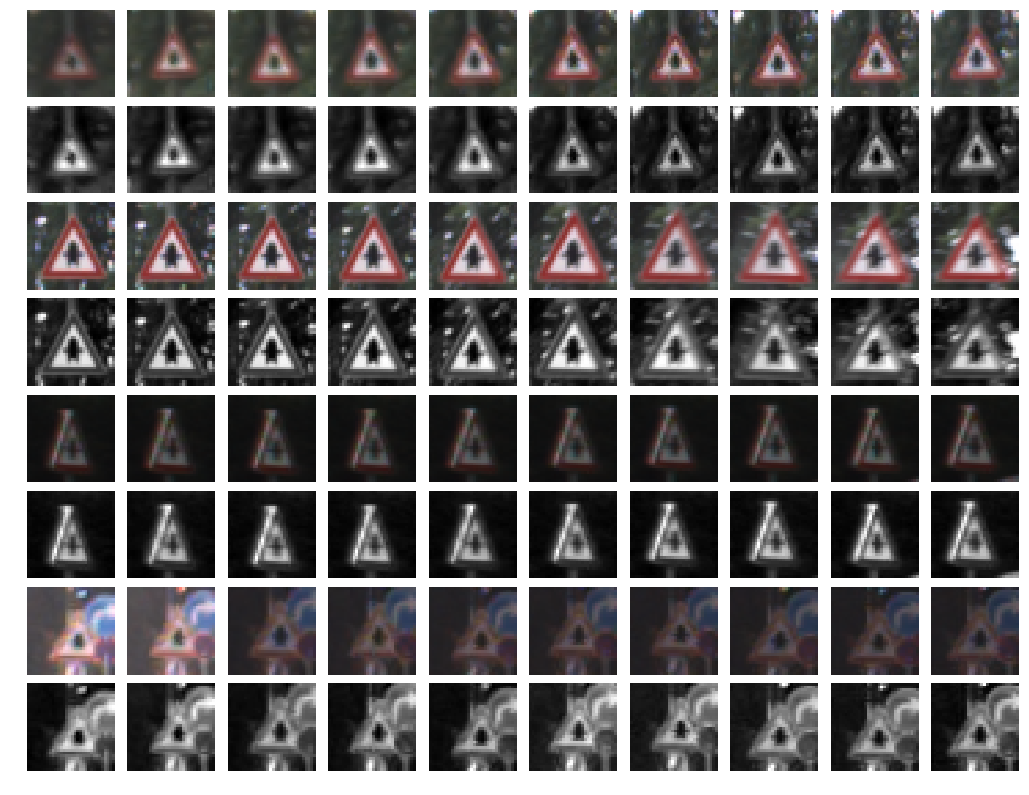

In [7]:
# compare Grey scale and RGB

n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [8]:
# check if data has to be shuffled

print(np.unique(Y_train))
print(Y_train[0:500])
print(Y_train[501:1000])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 3

In [9]:
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

X_test_mean = np.mean(X_test)
X_test_std = np.std(X_test)

X_valid_mean = np.mean(X_valid)
X_valid_std = np.std(X_valid)


print("mean for X_train", np.mean(X_train))
print("mean for X_test",np.mean(X_test))
print("mean for X_valid",np.mean(X_valid))


print("stddev for X train", np.std(X_train))
print("stdev for X test", np.std(X_test))
print("stdev for X valid", np.std(X_valid))


X_train_normalized = (X_train - X_train_mean)/X_train_std
X_test_normalized = (X_test - X_test_mean)/X_test_std
X_valid_normalized = (X_valid - X_valid_mean)/X_valid_std


print("standardized mean for X_train", np.mean(X_train_normalized))
print("standardized mean for X_test", np.mean(X_test_normalized))
print("standardized mean for X_valid", np.mean(X_valid_normalized))



print("standardized stdev for X_train", np.std(X_train_normalized))
print("standardized stddev for X_test", np.std(X_test_normalized))
print("standardized stddev for X_valid", np.std(X_valid_normalized))

X_train_max = np.max(X_train)
X_train_min = np.min(X_train)
X_train_normalized = (X_train - X_train_min)/(X_train_max - X_train_min)

X_test_max = np.max(X_test)
X_test_min = np.min(X_test)
X_test_normalized = (X_test - X_test_min)/(X_test_max - X_test_min)

X_valid_max = np.max(X_valid)
X_valid_min = np.min(X_valid)
X_valid_normalized = (X_valid - X_valid_min)/(X_valid_max - X_valid_min)

print("Normalized mean for X_train", np.mean(X_train_normalized))
print("Normalized mean for X_test", np.mean(X_test_normalized))
print("Normalized mean for X_valid", np.mean(X_valid_normalized))



print("Normalized stdev for X_train", np.std(X_train_normalized))
print("Normalized stddev for X_test", np.std(X_test_normalized))
print("Normalized stddev for X_valid", np.std(X_valid_normalized))



mean for X_train 82.677589037
mean for X_test 82.1484603612
mean for X_valid 83.5564273756
stddev for X train 66.0097957522
stdev for X test 66.7642435759
stdev for X valid 67.9870214471
standardized mean for X_train 8.21244085217e-16
standardized mean for X_test 1.58103494227e-15
standardized mean for X_valid 3.86689924223e-17
standardized stdev for X_train 1.0
standardized stddev for X_test 1.0
standardized stddev for X_valid 1.0
Normalized mean for X_train 0.314367065134
Normalized mean for X_test 0.311348447654
Normalized mean for X_valid 0.314225709503
Normalized stdev for X_train 0.262638444637
Normalized stddev for X_test 0.265993002295
Normalized stddev for X_valid 0.271948085788


Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


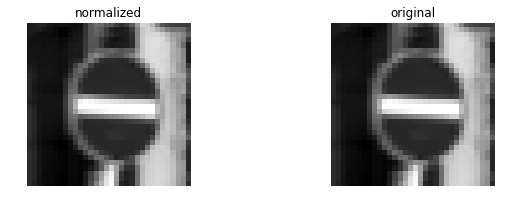

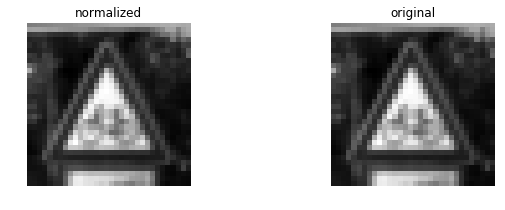

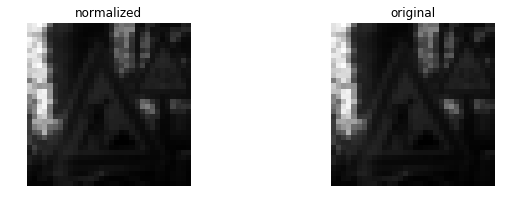

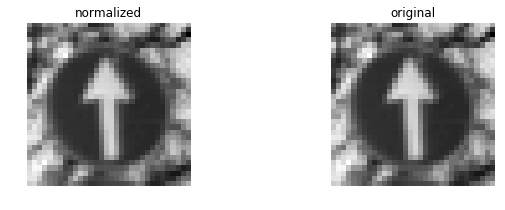

In [10]:

# check randmoly few images to check if images are fine


print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
for i in range(1,5):
    
    index = random.randint(0,len(X_train_normalized))
    fig, axs = plt.subplots(1,2, figsize=(10, 3))
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].set_title('normalized')
    axs[0].imshow(X_train_normalized[index].squeeze(), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('original')
    axs[1].imshow(X_train[index].squeeze(), cmap='gray')


34799
34799
shape in/out: (32, 32, 1) (32, 32, 1)
shape in/out: (32, 32, 1) (32, 32, 1)
shape in/out: (32, 32, 1) (32, 32, 1)
shape in/out: (32, 32, 1) (32, 32, 1)
34799
34799


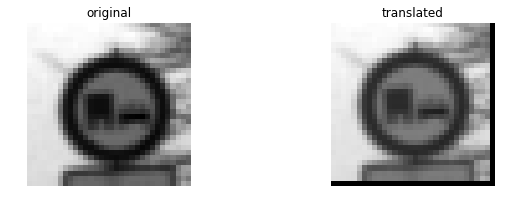

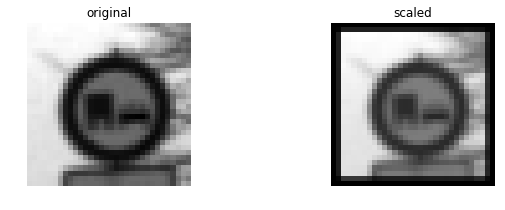

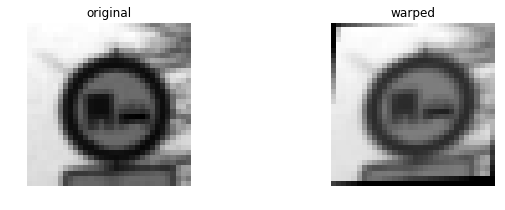

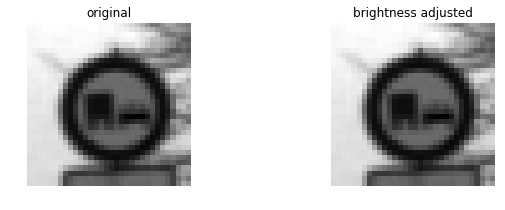

In [11]:
import cv2
print(len(X_train))
print(len(Y_train))

index = random.randint(0,len(X_train))

def random_translate(img):
    rows,cols,_ = img.shape
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

# test this function
test_img = X_train_normalized[index]
test_dst = random_translate(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')
print('shape in/out:', test_img.shape, test_dst.shape)

def random_scaling(img):
    rows,cols,_ = img.shape
    # transform limits
    px = np.random.randint(-2,2)
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:,:,np.newaxis]
    return dst

test_dst = random_scaling(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')
print('shape in/out:', test_img.shape, test_dst.shape)
    
def random_warp(img):
    rows,cols,_ = img.shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06 # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06
    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    pts1 = np.float32([[y1,x1],
    [y2,x1],
    [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
    [y2+rndy[1],x1+rndx[1]],
    [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

test_dst = random_warp(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')
print('shape in/out:', test_img.shape, test_dst.shape)
    

def random_brightness(img):
    shifted = img + 1.0 # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')
print('shape in/out:', test_img.shape, test_dst.shape)
print(len(X_train))
print(len(Y_train))



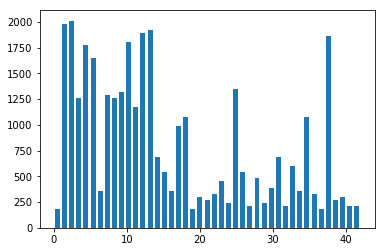

In [12]:
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(Y_train, bins=no_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [13]:
print(np.unique(Y_train), np.bincount(Y_train))
print("minimum samples for any label:", min(np.bincount(Y_train)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180


In [14]:
print(len(X_train))
print(len(Y_train))
      
print('X, y shapes:', X_train_normalized.shape, Y_train.shape)
input_indices = []
output_indices = []
for class_n in range(no_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(Y_train == class_n)
    n_samples = len(class_indices[0])
    print("no of samples is ", n_samples)
    if n_samples < 600:
        for i in range(600 - n_samples):
            #print('Entered loop')
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            Y_train = np.concatenate((Y_train, [class_n]), axis=0)
            
    print('')
print('X, y shapes:', X_train_normalized.shape, Y_train.shape)
print(len(X_train))
print(len(Y_train))
print(len(input_indices))

34799
34799
X, y shapes: (34799, 32, 32, 1) (34799,)
0 : no of samples is  180

1 : no of samples is  1980

2 : no of samples is  2010

3 : no of samples is  1260

4 : no of samples is  1770

5 : no of samples is  1650

6 : no of samples is  360

7 : no of samples is  1290

8 : no of samples is  1260

9 : no of samples is  1320

10 : no of samples is  1800

11 : no of samples is  1170

12 : no of samples is  1890

13 : no of samples is  1920

14 : no of samples is  690

15 : no of samples is  540

16 : no of samples is  360

17 : no of samples is  990

18 : no of samples is  1080

19 : no of samples is  180

20 : no of samples is  300

21 : no of samples is  270

22 : no of samples is  330

23 : no of samples is  450

24 : no of samples is  240

25 : no of samples is  1350

26 : no of samples is  540

27 : no of samples is  210

28 : no of samples is  480

29 : no of samples is  240

30 : no of samples is  390

31 : no of samples is  690

32 : no of samples is  210

33 : no of samples 

In [15]:
print(len(X_train_normalized))
print("train normalized mean is", np.mean(X_train_normalized))

41460
train normalized mean is 0.329363257175


34799
41460


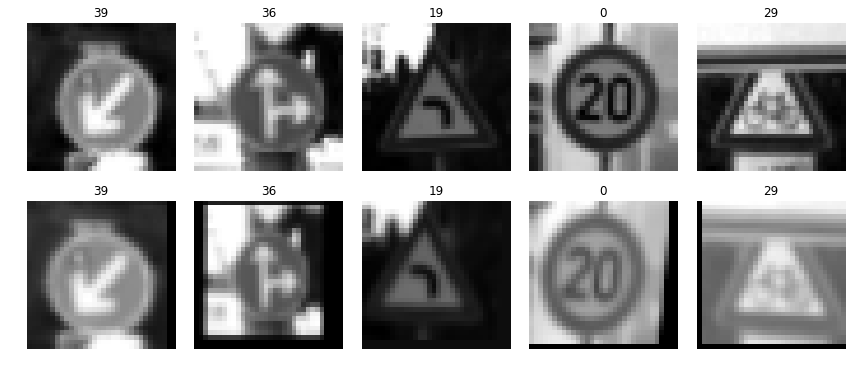

In [16]:
print(len(X_train))
print(len(Y_train))
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(Y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(Y_train[output_indices[picks[i]]])

In [17]:
print(len(input_indices))

6661


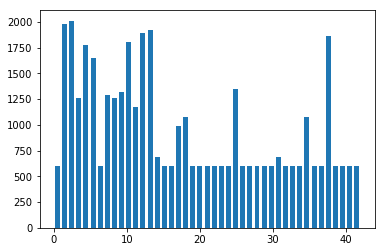

In [18]:
# histogram of label frequency
hist, bins = np.histogram(Y_train, bins=no_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [19]:
## Shuffle the training dataset
from sklearn.utils import shuffle
X_train_normalized, Y_train = shuffle(X_train_normalized, Y_train)
X_train = X_train_normalized
print('done')

X_test_normalized, Y_test = shuffle(X_test_normalized, Y_test)
X_test = X_test_normalized
print('done')

X_valid_normalized, Y_valid = shuffle(X_valid_normalized, Y_valid)
X_valid = X_valid_normalized
print('done')


# check if data has to be shuffled

print(np.unique(Y_train))
print(Y_train[0:500])
print(Y_train[501:1000])

done
done
done
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 7  0 31  9 31 23 38 25  5 10  1 10 13 21 25 34 10 33 12  9 35 13  6 37 38
 13  4  9 28 24 27 13 26 11 10 40 35 23  4  1  9  0  8 41 19  2  9 16 28  7
  8 37 11 30  0  9  5 10 23 20 26 25 13  8 13 10  2 13 40  1 36 30 32 17 34
 14 37 10 17 25 18 12 19 35 10 17 33  9 32 42 28  8 25 10  1 12 34  3 32  6
 37 27 12 26 38 26  6  0  3 37  7 29  3 38  2 15 32 31  5  0  1 14  9 13 35
 12 41 30  1  6 22 29 21 12 11 38  2  2  7 12 38 35 10 13 38 29 18  2 31 10
 35  4 35 13 22  5 23 13  4  8  1 11  2 38 36 11 29  9 24 12  7 13 16 37  5
  2  9 21  3 42 38  3 42  2 18 35 18 37 19 26 12 13 16 41  7 42  3 34 38  2
 14 38  1 18 18  4 13 12  3  5 38 22 11 10 12 24  1 25 23 24 39  6 24  3 34
 31 30 23 33  5 30 38 13 30 41  3 30 25 35 14 34  4  2 29 26 20  4 30 34 40
 12 38  6 33  4 29  8 42  1  2  2 21 36 30 28 39 38 39 36  5 17 36 13 10 13
 34  2 24 38 11 1

In [20]:
import tensorflow as tf
EPOCHS = 52
BATCH_SIZE = 84
print('done')

done


In [21]:
from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('done')

done


In [22]:
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
keep_prob  = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)
print('done')


done


In [23]:
rate = 0.0009
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



In [25]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print('done')



done


In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
 
   
   
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.657

EPOCH 2 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.852

EPOCH 4 ...
Validation Accuracy = 0.869

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.920

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.937

EPOCH 12 ...
Validation Accuracy = 0.951

EPOCH 13 ...
Validation Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.951

EPOCH 15 ...
Validation Accuracy = 0.954

EPOCH 16 ...
Validation Accuracy = 0.948

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.956

EPOCH 19 ...
Validation Accuracy = 0.957

EPOCH 20 ...
Validation Accuracy = 0.957

EPOCH 21 ...
Validation Accuracy = 0.955

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.960

EPOCH 24 ...
Validation Accurac

In [29]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.945


images1/
index is  0
label index is  Bumpy road
images1/2.png
index is  1
label index is  Ahead only
images1/3.png
index is  2
label index is  General caution
images1/1 (2).png
index is  3
label index is  Speed limit (30km/h)
images1/1b.png
index is  4
label index is  General caution
images1/1.jpg
index is  5
label index is  General caution
images1/6.png
index is  6
label index is  Speed limit (30km/h)
images1/1.png
(7, 32, 32, 1)


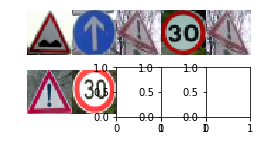

In [42]:
# now test with new images

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import csv


#enable inline visualization
%matplotlib inline

folder_name = 'images1/'
img_labels = np.array([22,35,18,1,18,18,1])

#folder_name='images2/'
#img_labels = np.array([22,35,15,18,1,37])


print(folder_name)


get_label = np.genfromtxt('data/signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S55')],
delimiter=',')

fig, axs = plt.subplots(2,5, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

index = 0
my_images = []


labels = {}

#22 - bumpy road
#35 - Ahead only
#18 - General caution
#1 - 30 kms per hour
#15 - No vehicles
#37- go straight or left

for i, img in enumerate(os.listdir(folder_name)):
    if img[-3:] in ('png', 'jpg'):
        image = cv2.imread(folder_name + img)
        axs[index].axis('off')
        axs[index].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        print('index is ', index)
        labels[index]= get_label[img_labels[index]][1].decode('ascii')
        print('label index is ', labels[index])
        print(folder_name + img)
        my_images.append(image)
        index = index + 1

my_images = np.asarray(my_images)
                        
my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)
                        
my_images_normalized = (my_images_gry - 128)/128
                        
print(my_images_normalized.shape)


In [43]:
# test the new images
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # saver = tf.train.import_meta_graph('./lenet.meta')
    #saver.restore(sess, "./lenet")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images_normalized, img_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

My Data Set Accuracy = 1.000


In [44]:
# test each images

single_image = []
single_image_label = []
no_of_images = 6

for index in range(no_of_images):
    print("current index is ", index)
    single_image = []
    single_image_label = []
    single_image.append(my_images_normalized[index])
    single_image_label.append(img_labels[index])
    print(len(single_image))
    print(len(single_image_label))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # saver.restore(sess, "./lenet")
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        model_accuracy = evaluate(single_image, single_image_label)
        print('Image {}'.format(index+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()
        

current index is  0
1
1
Image 1
Image Accuracy = 1.000

current index is  1
1
1
Image 2
Image Accuracy = 1.000

current index is  2
1
1
Image 3
Image Accuracy = 1.000

current index is  3
1
1
Image 4
Image Accuracy = 1.000

current index is  4
1
1
Image 5
Image Accuracy = 1.000

current index is  5
1
1
Image 6
Image Accuracy = 1.000



In [45]:
#define all required inputs/function
k_size = 5 # top 5 softmax output
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k = k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    print(my_top_k)
    

TopKV2(values=array([[  1.00000000e+00,   1.13607684e-18,   2.77682011e-20,
          3.19724472e-21,   2.99252838e-23],
       [  1.00000000e+00,   1.19742632e-10,   1.18682304e-11,
          5.34357714e-12,   1.61243360e-12],
       [  9.99963403e-01,   3.64561020e-05,   1.03646521e-07,
          1.20610233e-09,   6.23700050e-11],
       [  9.95573044e-01,   4.42113867e-03,   3.77527635e-06,
          1.02757645e-06,   9.17257353e-07],
       [  9.99965906e-01,   3.39920553e-05,   1.38865445e-07,
          1.34016243e-09,   6.31852140e-11],
       [  1.00000000e+00,   5.54507640e-36,   4.23992863e-36,
          0.00000000e+00,   0.00000000e+00],
       [  9.97676194e-01,   2.32379045e-03,   3.97210975e-08,
          6.98274424e-11,   5.58187512e-15]], dtype=float32), indices=array([[22, 29, 26, 25, 28],
       [35, 34, 36,  9,  3],
       [18, 26, 36, 22, 33],
       [ 1,  4, 14, 13, 38],
       [18, 26, 36, 22, 33],
       [18, 26, 27,  0,  1],
       [ 1,  4, 14, 40,  2]], dtype=in